1) Questão: Como se comporta os dados do número de nascidos em uma série temporal?

Hipótese: existe uma variação anual entre todas as linhagens nascidas no Biotério.



In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

plt.rcParams.update({'font.size': 20})
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

In [2]:
eel = pd.read_csv('../tabelas_test/est_est_log_2019-06-18.csv', index_col='id')
eel.head()

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
1,1408122540,Giovanny,Swiss A,3,m,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA
2,1408122540,Giovanny,Swiss A,2,f,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA
3,1408122540,Giovanny,Swiss B,3,m,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA
4,1408122540,Giovanny,Swiss B,3,f,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA
5,1408122540,Giovanny,Swiss B,4,f,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA


In [3]:
#Filtrando coluna com as condições

num_nasc = eel[(eel['util'] == 'nasc') & (eel['num_nasc'] < 200)]

#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++=

#lista com nome das colunas referentes a datas
datas = ['date_hoje', 
         'date_nasc', 
         'data_inicio', 
         'date_acas', 
         'date_nasc_acas', 
         'date_sex', 
         'data_solic', 
         'data_forn', 
         'data_fim']

#laço que em c percorre em datas e padronizando tudo em formato de data pela função to_datetime
for c in datas:
    num_nasc[c] = pd.to_datetime(num_nasc[c], unit = 's') #indica o formato das datas
    
num_nasc.head()

/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
116,2014-09-23 17:40:33,Tania,Swiss E,5,AAA,1970-01-01 00:11:06,54,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:06:07,2014-09-23 17:40:33,5,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
117,2014-09-23 17:40:33,Tania,Swiss E,10,AAA,1970-01-01 00:11:06,56,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:14:19,2014-09-23 17:40:33,10,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
118,2014-09-23 17:40:33,Tania,Swiss C,20,AAA,1970-01-01 00:11:06,62,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:46:07,2014-09-23 17:40:33,20,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
119,2014-09-23 17:40:47,Tania,Swiss E,10,AAA,1970-01-01 00:11:06,116,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:06:07,2014-09-23 17:40:47,10,2014-10-14 17:40:47,666,666,666,666,AAA,AAA
120,2014-09-23 17:40:47,Tania,Swiss E,20,AAA,1970-01-01 00:11:06,117,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:14:19,2014-09-23 17:40:47,20,2014-10-14 17:40:47,666,666,666,666,AAA,AAA


In [4]:
#Filtrando linhagens a não serem utilizadas
ling_ex = [
    'Test',
    'AAA',
    'Swiss',
    'C57BL06WT\t',
    'Swiss/CFW B',
    'Swiss/CFW D',
    'Swiss/CFW A',
    'Swiss/CFW C',
    'Swiss/CFW',
    'Swiss-2',
    'Swiss-2 A ',
    'NZB/BINJ',
    'NZW/LacJ',
    'NOD / SHILTJ'
]

tirar_ling = num_nasc[
    (num_nasc['ling'] != ling_ex[0]) &
    (num_nasc['ling'] != ling_ex[1]) &
    (num_nasc['ling'] != ling_ex[2]) &
    (num_nasc['ling'] != ling_ex[3]) &
    (num_nasc['ling'] != ling_ex[4]) &
    (num_nasc['ling'] != ling_ex[5]) &
    (num_nasc['ling'] != ling_ex[6]) &
    (num_nasc['ling'] != ling_ex[7]) &
    (num_nasc['ling'] != ling_ex[8]) &
    (num_nasc['ling'] != ling_ex[9]) &
    (num_nasc['ling'] != ling_ex[10]) &
    (num_nasc['ling'] != ling_ex[11]) &
    (num_nasc['ling'] != ling_ex[12]) &
    (num_nasc['ling'] != ling_ex[13])
]
len(tirar_ling)

1785

In [5]:
# ling_ex = [
#     'Test',
#     'AAA',
#     'Swiss',
#     'C57BL06WT\t',
#     'Swiss/CFW B',
#     'Swiss/CFW D',
#     'Swiss/CFW A',
#     'Swiss/CFW C',
#     'Swiss/CFW',
#     'Swiss-2',
#     'Swiss-2 A ',
#     'NZB/BINJ',
#     'NZW/LacJ',
#     'NOD / SHILTJ'
# ]

# #Fiz uma condição para que as linhagens da lista acima fosse filtradas e descartadas da análise

# if all(num_nasc['ling'] != tuple(ling_ex)): #função all(iterável)`Retorna `True` se todos os elementos do iterável forem verdadeiros (ou se o iterável for vazio).
#     #Transformei a lista numa tupla pq o tamanho como lista estava interferindo, resultando em erro
#     print ('deu') #caso fosse TRUE
# else:
#     print('nao deu')

deu


A Dataframe é uma forma de organizar os dados como uma tabela, contendo as informações das colunas e cada instância (dado).
Na próxima célula foi criada uma Dataframe (serie_temp_ling) que foi criada para organizar o que for analizado. Para criar essa DataFrame, foi feita a partir de outra (tirar_ling) mantendo as mesmas informações de cada coluna. Tenho como index a coluna 'date_hoje'. As colunas podem estar dispostas em qualquer ordem. Você pode acrescentar apenas o que vai usar.

In [6]:
# Criação de uma DataFrame

serie_temp_ling = pd.DataFrame(tirar_ling['date_hoje'])
serie_temp_ling['ling'] = tirar_ling['ling'] 
serie_temp_ling['num_nasc'] = tirar_ling['num_nasc']
serie_temp_ling = serie_temp_ling.set_index('date_hoje') 
serie_temp_ling.head()

,ling,num_nasc
date_hoje,,
2014-09-23 17:40:33,Swiss E,5
2014-09-23 17:40:33,Swiss E,10
2014-09-23 17:40:33,Swiss C,20
2014-09-23 17:40:47,Swiss E,10
2014-09-23 17:40:47,Swiss E,20


Na próxima célula foi plotado o gráfico da Série Temporal de todos os dados da DataFrame acima. 
Como os dados estão organizados por períodos (anos) é interessante avaliar como os dados se compotam durante cada ano. 

Para plotar esse gráfico, abrimos uma nova váriavel que recebe a variável do tipo DataFrame, filtrando apenas a coluna 'num_nasc' que estão os valores de nascimento.
Após isso foi declarada uma nova varíavel com a função para decomposição dos dados (com frequencia de 12 meses). Plotando cada gráfico - N° total de animais, Tendência, Sazonalidade e Aleatoriedade.

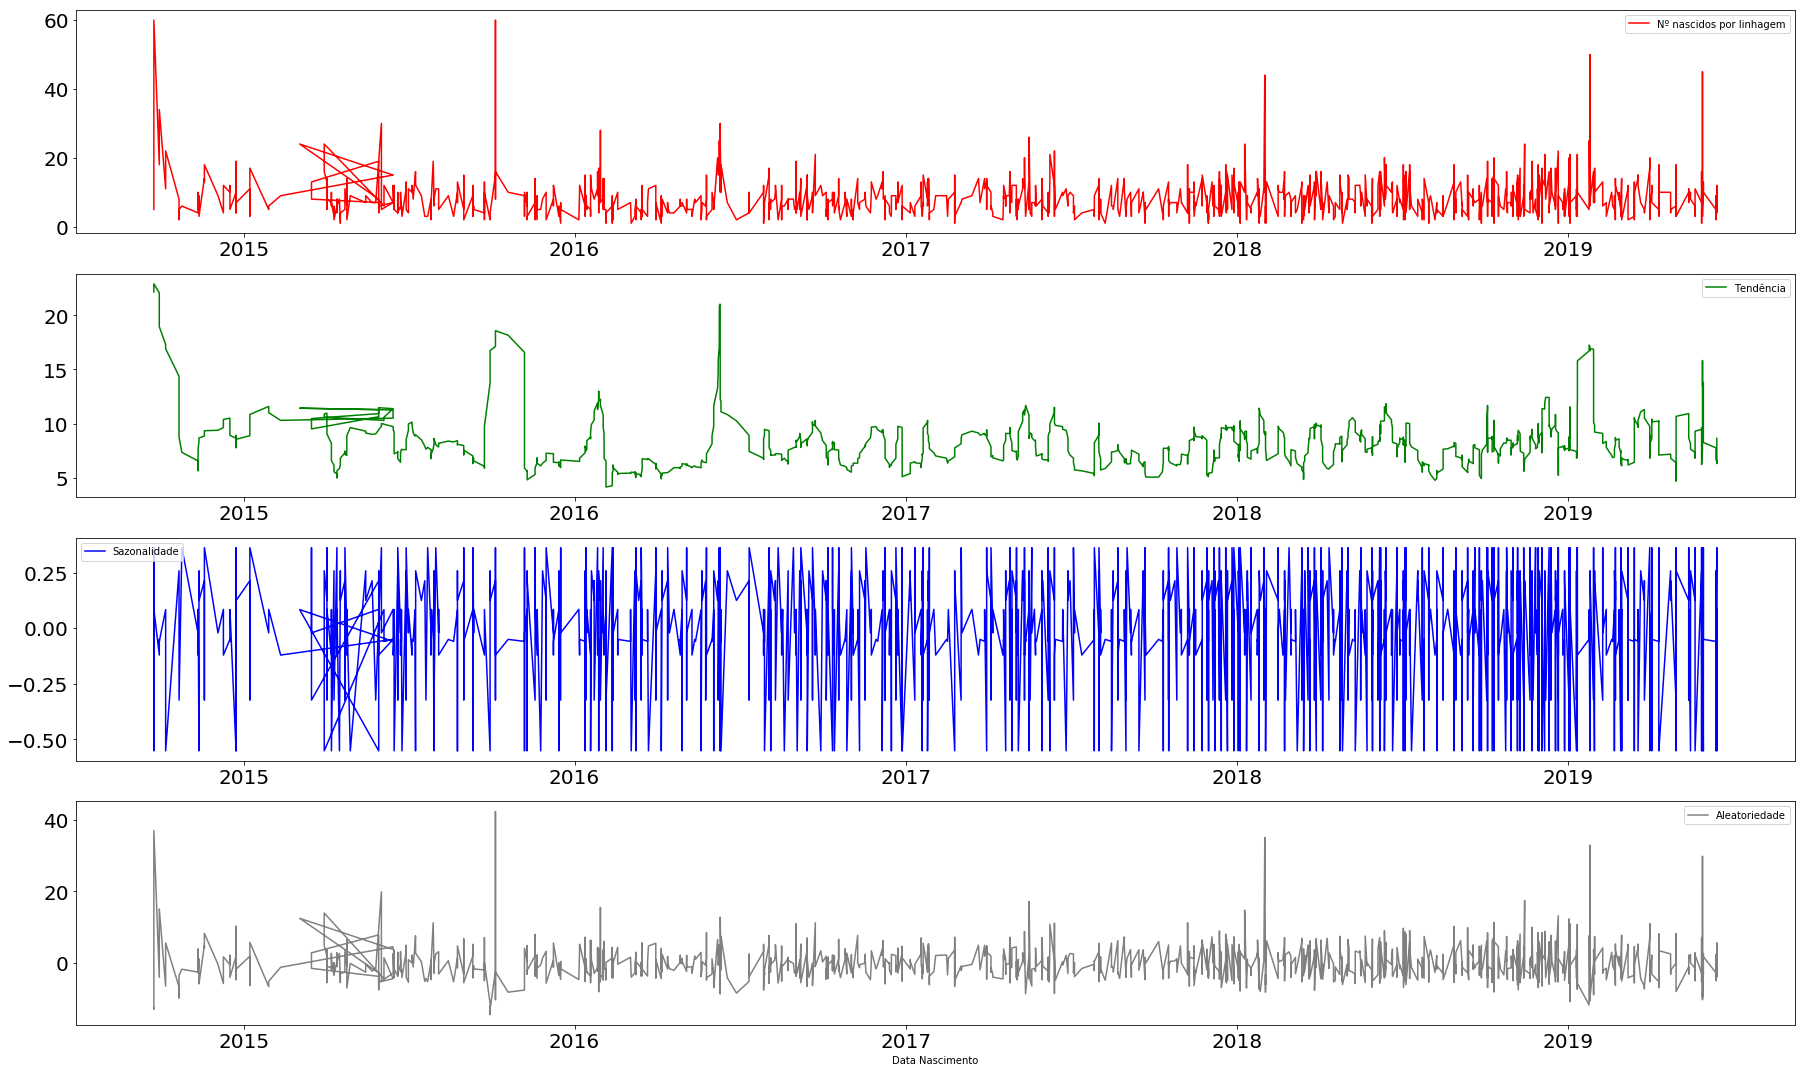

In [7]:
ser_temp_ling = serie_temp_ling['num_nasc']
decom = seasonal_decompose(ser_temp_ling, freq=12)

#Plotagem de gráfico ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt.figure(figsize=(25, 15))
plt.title('Decomposição da Série Temporal Nascimento de Animais') 
plt.legend(['Decomposição da Série Temporal Nascimento de Animais'])

plt.subplot(4, 1, 1)
plt.plot(ser_temp_ling, label = 'Nº nascidos por linhagem', color='red')
plt.legend(loc = 'best')

plt.subplot(4, 1, 2)
plt.plot(decom.trend, label = 'Tendência', color='green')
plt.legend(loc = 'best')

plt.subplot(4, 1, 3)
plt.plot(decom.seasonal, label = 'Sazonalidade', color='blue')
plt.legend(loc = 'best')

plt.subplot(4, 1, 4)
plt.plot(decom.resid, label = 'Aleatoriedade', color='grey')
plt.legend(loc = 'best')

plt.xlabel('Data Nascimento')
plt.tight_layout()
plt.savefig(
    fname="../resultados/1_pergunta_serietemp.tiff", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)


Resultado: A decomposição em série foi dividida entre 4 gráficos:

1) Gráfico com o Total de nascidos de todas as linhagens utilizadas no biotério.
Apresenta alguns picos no ano 2015 que é o mesmo ano de implementação das linhagens no novo biotério
altos picos em 2016, 2018 e 2019 - coincidindo com o período de maior criação de animais.


2) Gráfico apresenta a Tendência, na qual não é clara e nem distinguível.. não traçando uma linha
clara dos dados do BioterC. Sugerindo que em uma equação simples não é possível ter uma resposta.

3) Gráfico apresenta a Sazonalidade, sem um padrão de repetição claro, mostrando dados sem compreensão
no ano de 2015 e final de 2016.

4) Gráfico apresenta a Aleatoriedade, o que resultou da Tendência e Sazonalidade (ruído).



Desdobramento: Após determinar a decomposição em série de todos os animais produzidos no biotério, foi analisada cada linhagem por vez, para avaliar como cada gráfico se comporta e a frequência da produção de cada linhagem dentro do período desde o ínicio de sua produção até Junho de 2019.

